In [38]:
#Question 1 

import numpy as np
import pandas as pd 
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.getcwd()

'/Users/ashar/Downloads'

In [5]:
os.chdir('/Users/ashar/Desktop')

In [41]:
data = pd.read_csv("MROZ.csv")

In [42]:
data.head().T

,0,1,2,3,4
inlf,1.000000,1.000000,1.000000,1.000000,1.000000
hours,1610.000000,1656.000000,1980.000000,456.000000,1568.000000
kidslt6,1.000000,0.000000,1.000000,0.000000,1.000000
kidsge6,0.000000,2.000000,3.000000,3.000000,2.000000
age,32.000000,30.000000,35.000000,34.000000,31.000000
educ,12.000000,12.000000,12.000000,12.000000,14.000000
wage,3.354000,1.388900,4.545500,1.096500,4.591800
repwage,2.650000,2.650000,4.040000,3.250000,3.600000
hushrs,2708.000000,2310.000000,3072.000000,1920.000000,2000.000000
husage,34.000000,30.000000,40.000000,53.000000,32.000000


In [43]:
#Checking for nulls
data.isnull().sum()

inlf          0
hours         0
kidslt6       0
kidsge6       0
age           0
educ          0
wage        325
repwage       0
hushrs        0
husage        0
huseduc       0
huswage       0
faminc        0
mtr           0
motheduc      0
fatheduc      0
unem          0
city          0
exper         0
nwifeinc      0
lwage       325
expersq       0
dtype: int64

In [14]:
#Checking the datatypes 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 22 columns):
inlf        753 non-null int64
hours       753 non-null int64
kidslt6     753 non-null int64
kidsge6     753 non-null int64
age         753 non-null int64
educ        753 non-null int64
wage        428 non-null float64
repwage     753 non-null float64
hushrs      753 non-null int64
husage      753 non-null int64
huseduc     753 non-null int64
huswage     753 non-null float64
faminc      753 non-null int64
mtr         753 non-null float64
motheduc    753 non-null int64
fatheduc    753 non-null int64
unem        753 non-null float64
city        753 non-null int64
exper       753 non-null int64
nwifeinc    753 non-null float64
lwage       428 non-null float64
expersq     753 non-null int64
dtypes: float64(7), int64(15)
memory usage: 129.5 KB


In [48]:
data = data.drop(['wage'], 1)

In [49]:
#Checking if we dropped the column
data.columns

Index(['inlf', 'kidslt6', 'kidsge6', 'age', 'educ', 'repwage', 'hushrs',
       'husage', 'huseduc', 'huswage', 'faminc', 'mtr', 'motheduc', 'fatheduc',
       'unem', 'city', 'exper', 'nwifeinc', 'expersq'],
      dtype='object')

In [50]:
#Checking for nulls after dropping the colum
data.isnull().sum()

inlf        0
kidslt6     0
kidsge6     0
age         0
educ        0
repwage     0
hushrs      0
husage      0
huseduc     0
huswage     0
faminc      0
mtr         0
motheduc    0
fatheduc    0
unem        0
city        0
exper       0
nwifeinc    0
expersq     0
dtype: int64

In [37]:
#Checking average values for all columns for inlf
data.groupby(['inlf']).mean()

,kidslt6,kidsge6,age,educ,repwage,hushrs,husage,huseduc,huswage,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,expersq
inlf,,,,,,,,,,,,,,,,,,
0,0.366154,1.356923,43.283077,11.796923,0.090154,2311.790769,45.793846,12.332308,7.819248,21698.052308,0.692731,8.901538,8.572308,8.726154,0.646154,7.461538,21.698052,103.393846
1,0.140187,1.350467,41.971963,12.658879,3.185864,2233.464953,44.609813,12.612150,7.226226,24130.422897,0.668333,9.516355,8.988318,8.545561,0.640187,13.037383,18.937483,234.719626


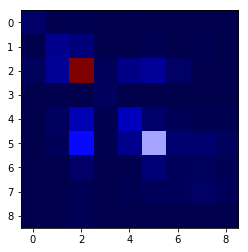

In [39]:
#Here we can see the father eduction and mother education are closely related 
plt.imshow(pd.crosstab(data.motheduc, data.fatheduc),
           cmap='seismic', interpolation='none');

Text(0.5,1,'Labor Force')

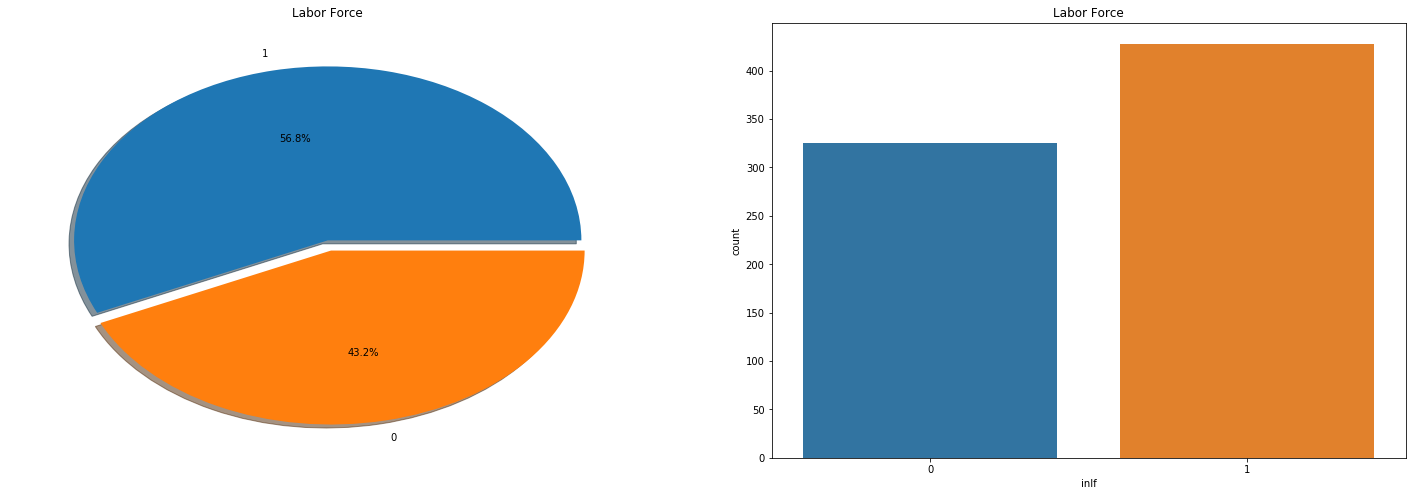

In [56]:
f, ax=plt.subplots(1,2,figsize=(25,8))
data['inlf'].value_counts().plot.pie(explode=[0,0.06],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Labor Force')
ax[0].set_ylabel('')
sns.countplot('inlf',data=data,ax=ax[1])
ax[1].set_title('Labor Force')


Text(0.5,1,'Labor Force = 1')

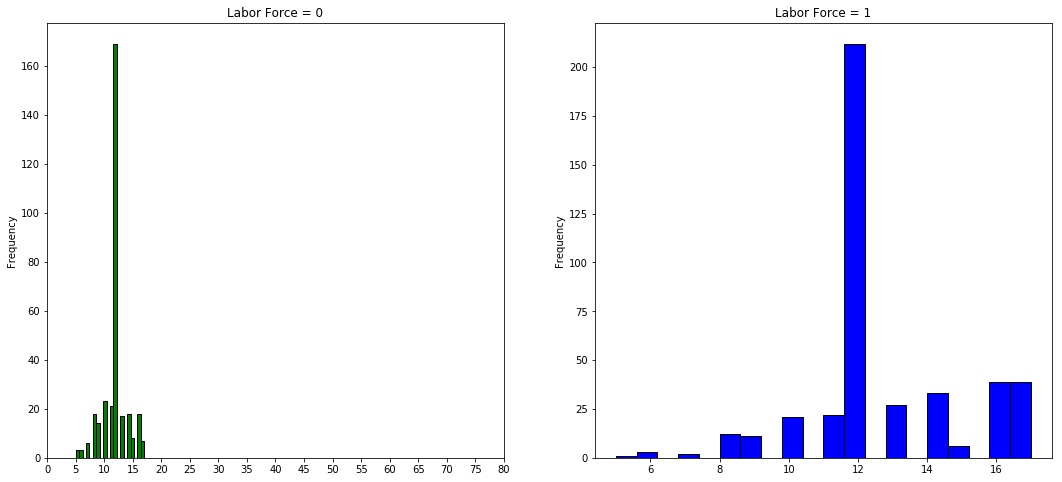

In [63]:
# Person Education Experience vs Labor FOrce Histogram 
f, ax = plt.subplots(1,2, figsize=(18,8))
data[data['inlf']==0].educ.plot.hist(ax=ax[0], bins = 20, edgecolor='black',color='green')
ax[0].set_title('Labor Force = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)        
data[data['inlf']==1].educ.plot.hist(ax=ax[1], bins = 20, edgecolor = 'black', color = 'blue')
ax[1].set_title('Labor Force = 1')

Text(0.5,1,'Labor Force = 1')

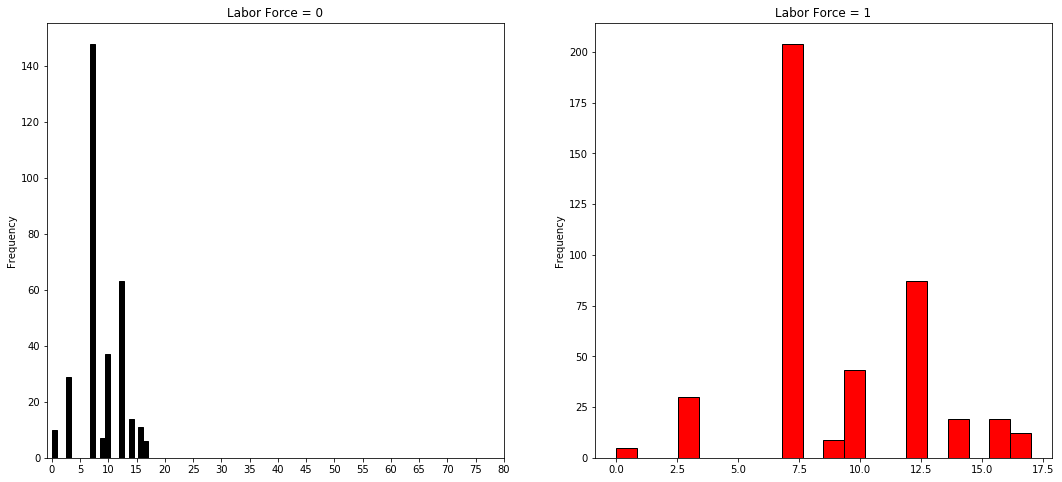

In [62]:
# Father Education Experince vs Labor Force Histogram 
f, ax = plt.subplots(1,2, figsize=(18,8))
data[data['inlf']==0].fatheduc.plot.hist(ax=ax[0], bins = 20, edgecolor='black',color='black')
ax[0].set_title('Labor Force = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)        
data[data['inlf']==1].fatheduc.plot.hist(ax=ax[1], bins = 20, edgecolor = 'black', color = 'red')
ax[1].set_title('Labor Force = 1')

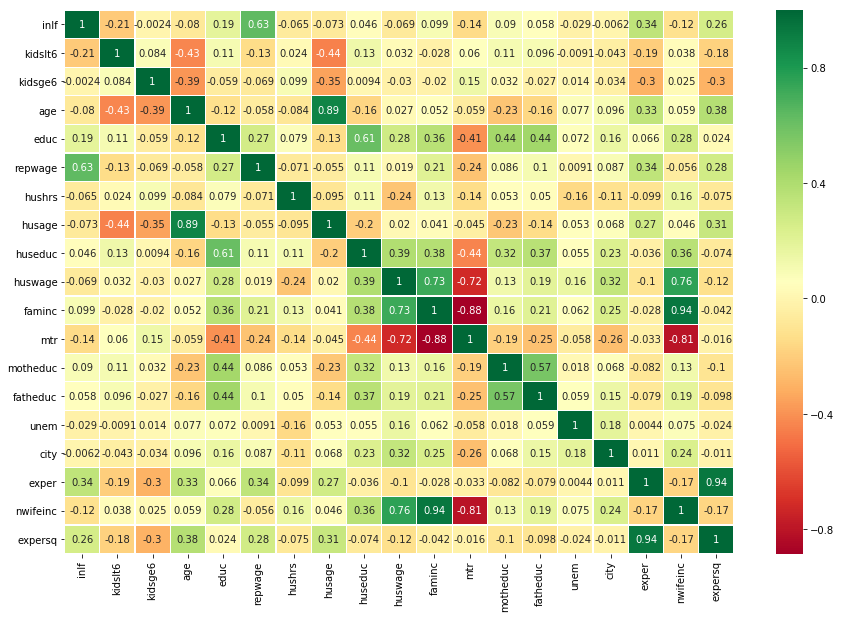

In [65]:
#Heat map for correlation
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.show()

In [69]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
import warnings 
warnings.filterwarnings("ignore")

In [70]:
#Splitting data into test and train
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['inlf'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['inlf']

In [71]:
#Logistic Regression
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.9557522123893806


In [72]:
#KNN
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.5442477876106194


In [73]:
#Decison Tree
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.7743362831858407


In [75]:
#Random Forest
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8672566371681416


In [76]:
#Cross Validation Mean
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Logistic Regression','KNN','Decision Tree','Random Forest']
models=[LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Logistic Regression,0.946965,0.038834
KNN,0.420561,0.111244
Decision Tree,0.754158,0.068743
Random Forest,0.834140,0.051656


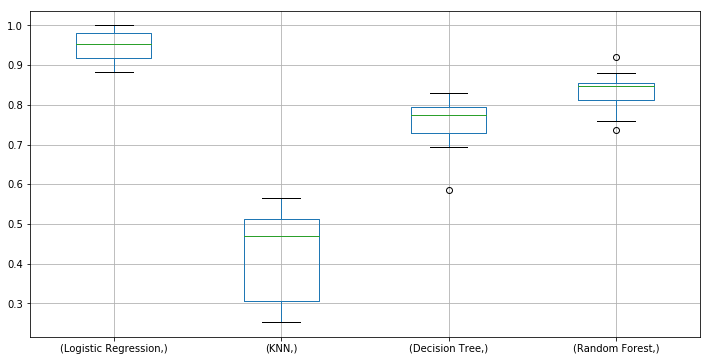

In [77]:
#Box Plot for the Classifiers
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

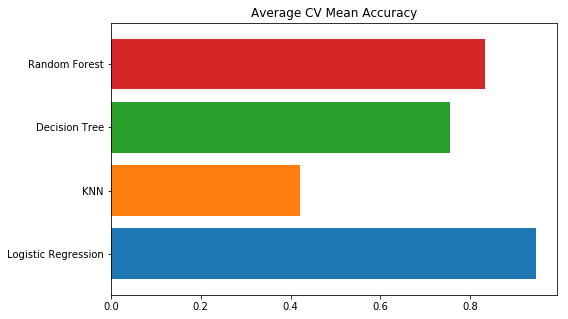

In [78]:
#Average Cross Validation Mean Accuracy
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

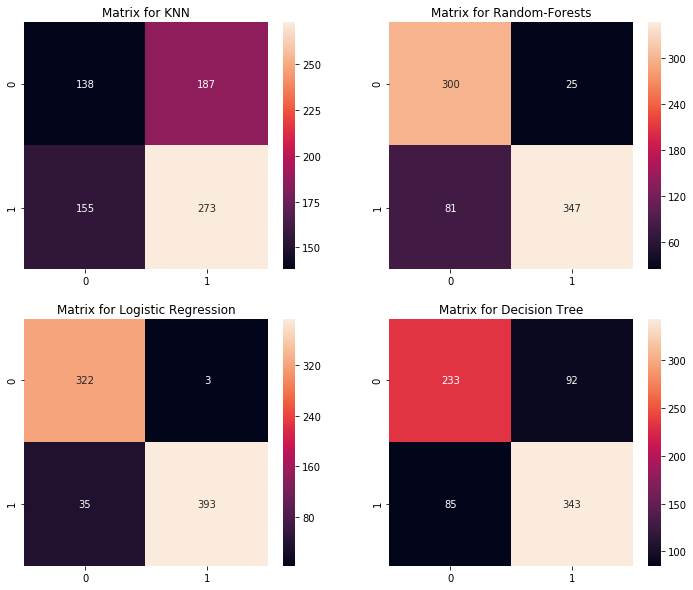

In [87]:
#COnfusion Matrux for different Classifiers 
f,ax=plt.subplots(2,2,figsize=(12,10))
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Decision Tree')
plt.show()